<a href="https://colab.research.google.com/github/AdarshNagpure/Find-Me-SOC-project/blob/main/Copy_of_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

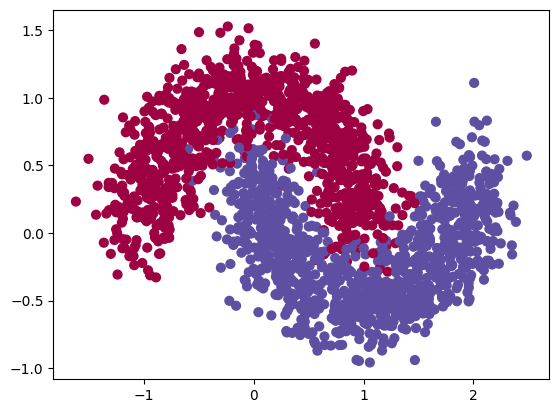

In [2]:
# generating random dataset
from sklearn.datasets import make_moons
np.random.seed(0)
X_T, Y_T = make_moons(2000, noise=0.20)
plt.scatter(X_T[:,0], X_T[:,1], s=40, c=Y_T, cmap=plt.cm.Spectral)
plt.show()

# creating x_train, y_train, x_test and y_test
x_train = X_T[0:1500]
y_train = Y_T[0:1500]
x_test = X_T[1500:2000]
y_test = Y_T[1500:2000]
x_test = x_test.T
y_test = y_test.T
x_train = x_train.T
y_train = y_train.T

## Clearly the separation boundary is not linear for the above dataset so Logistic Regression is not expected to give great results. Let us try to use it anyways and check what we get.

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train.T, y_train.T)
score = logisticRegr.score(x_test.T, y_test.T)
print("success rate :-", score*100, "%")

success rate :- 86.6 %


## Logistic regression did fairly well but not great. Now let us build our own neural network and see what performance we get.

## You will build a neural network where you get to decide the number of layers and the number of neurons in each layer

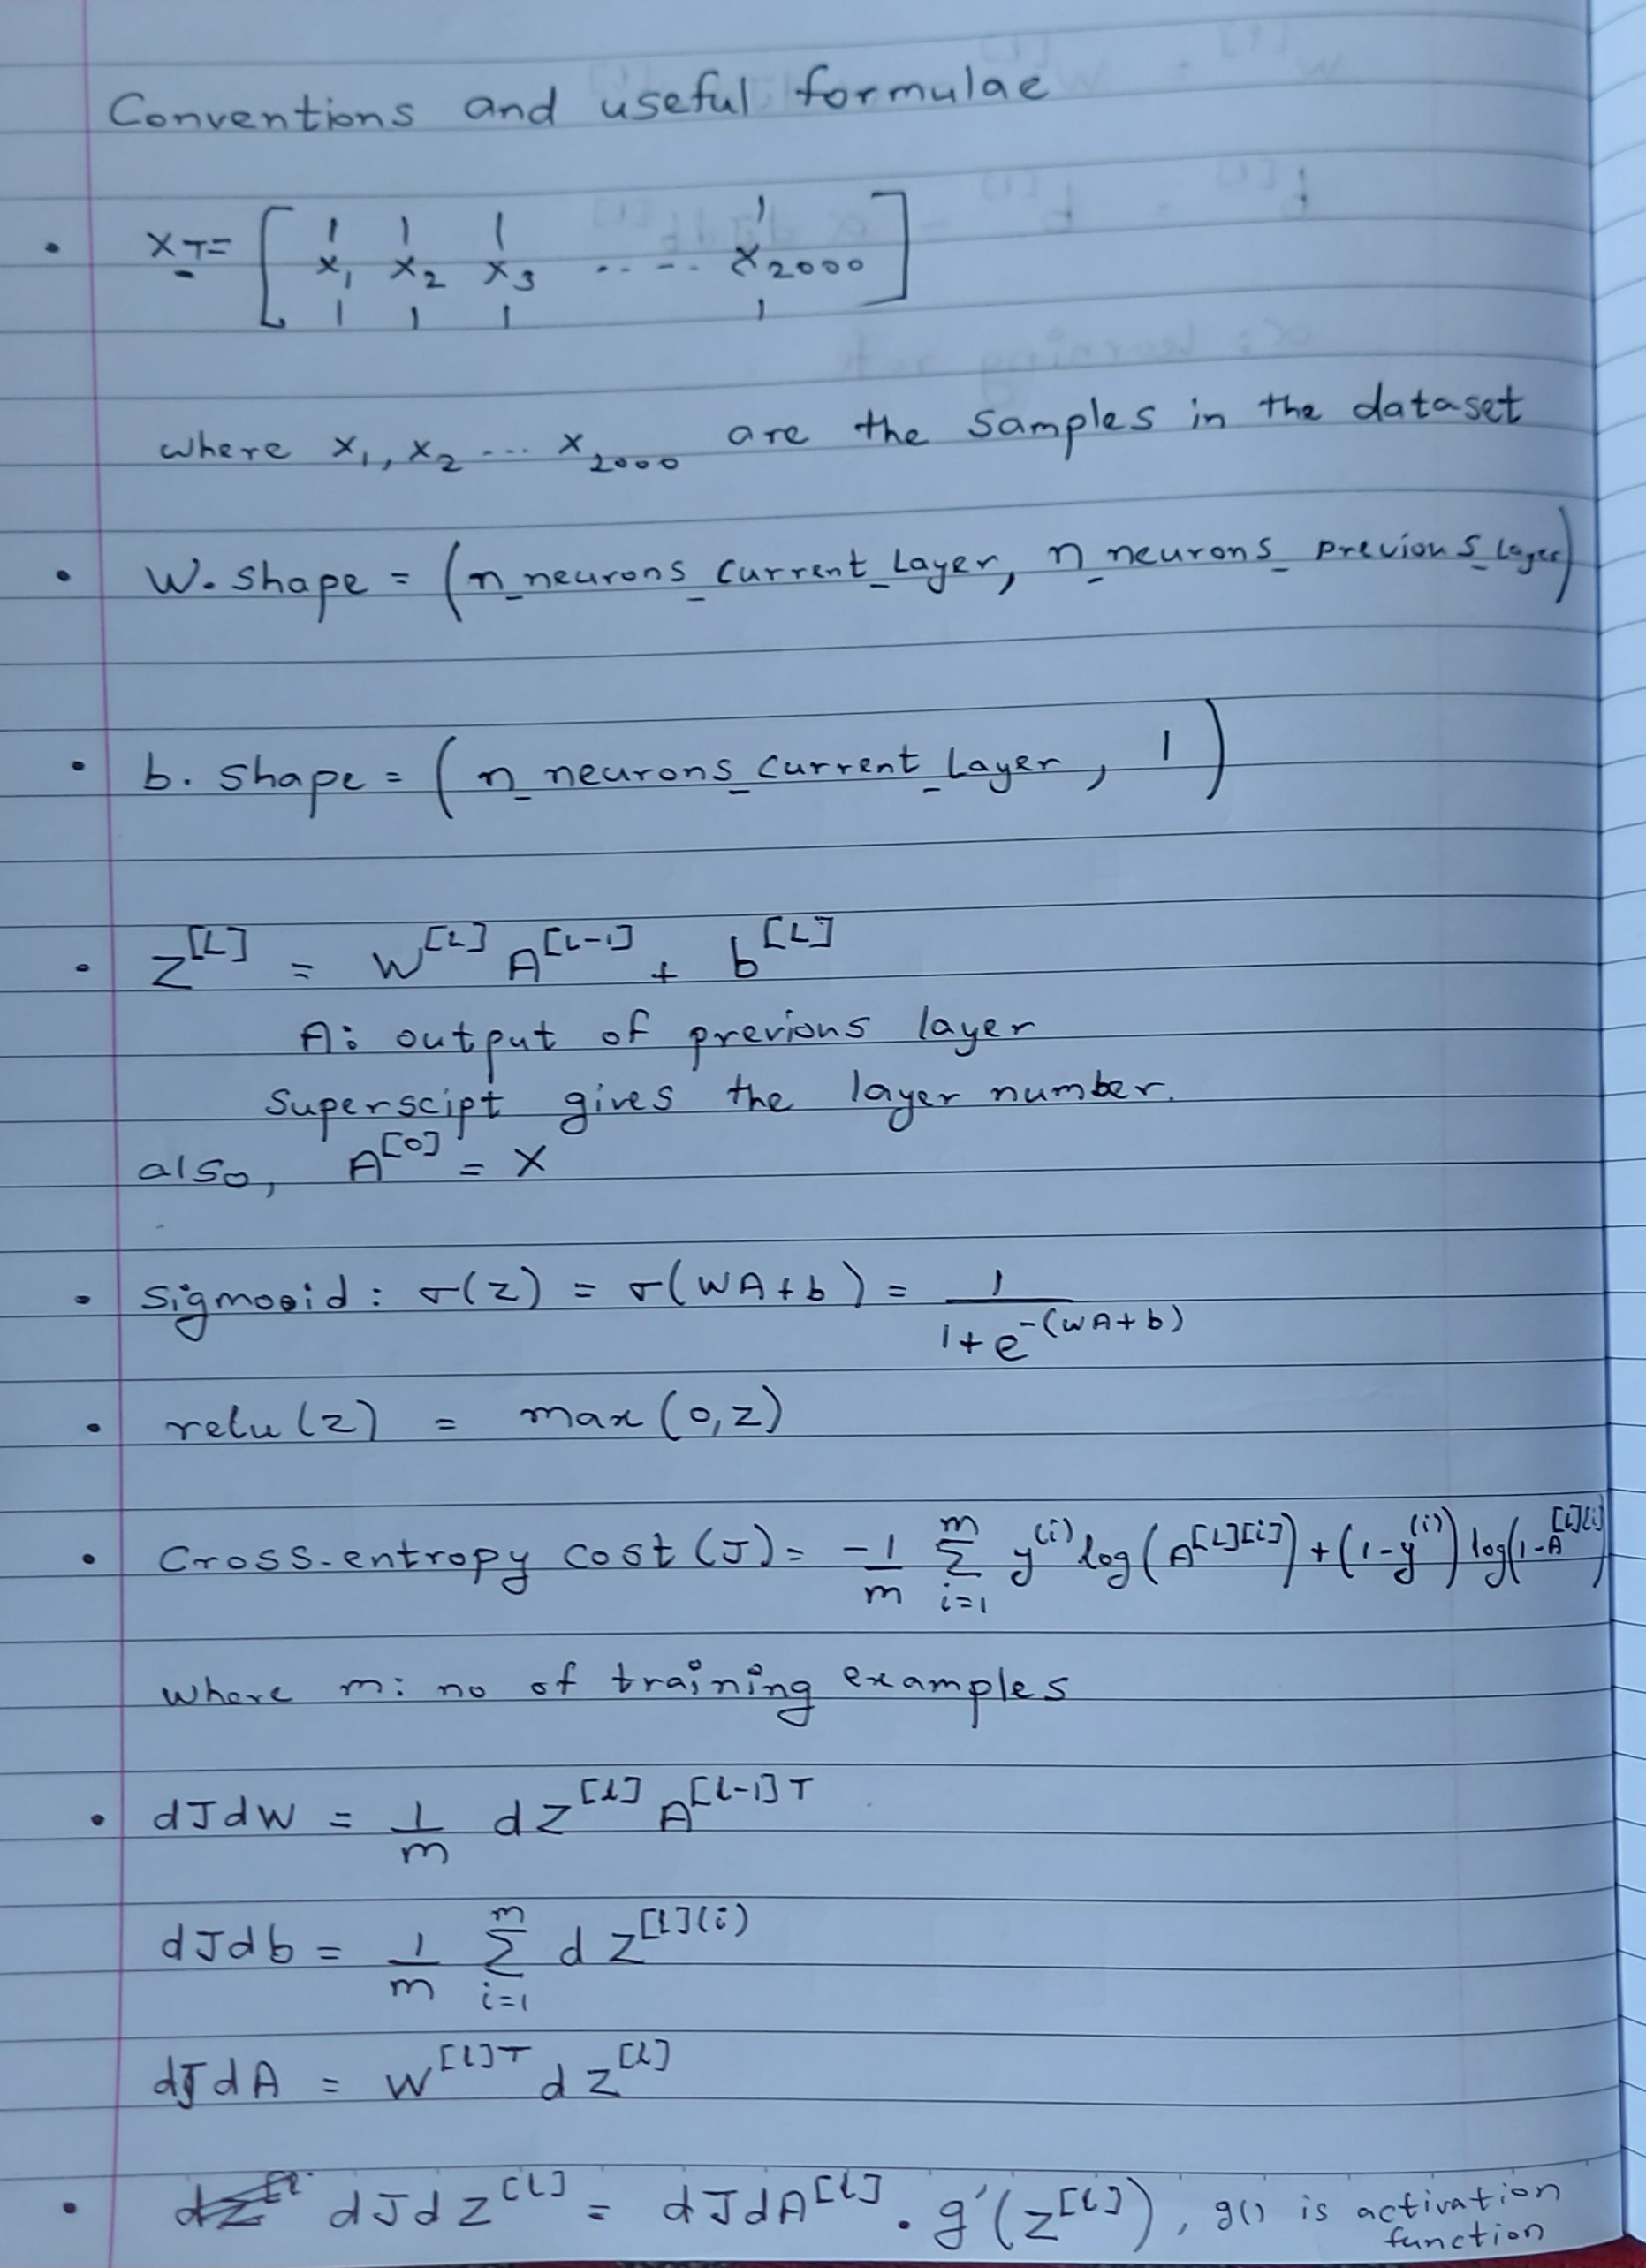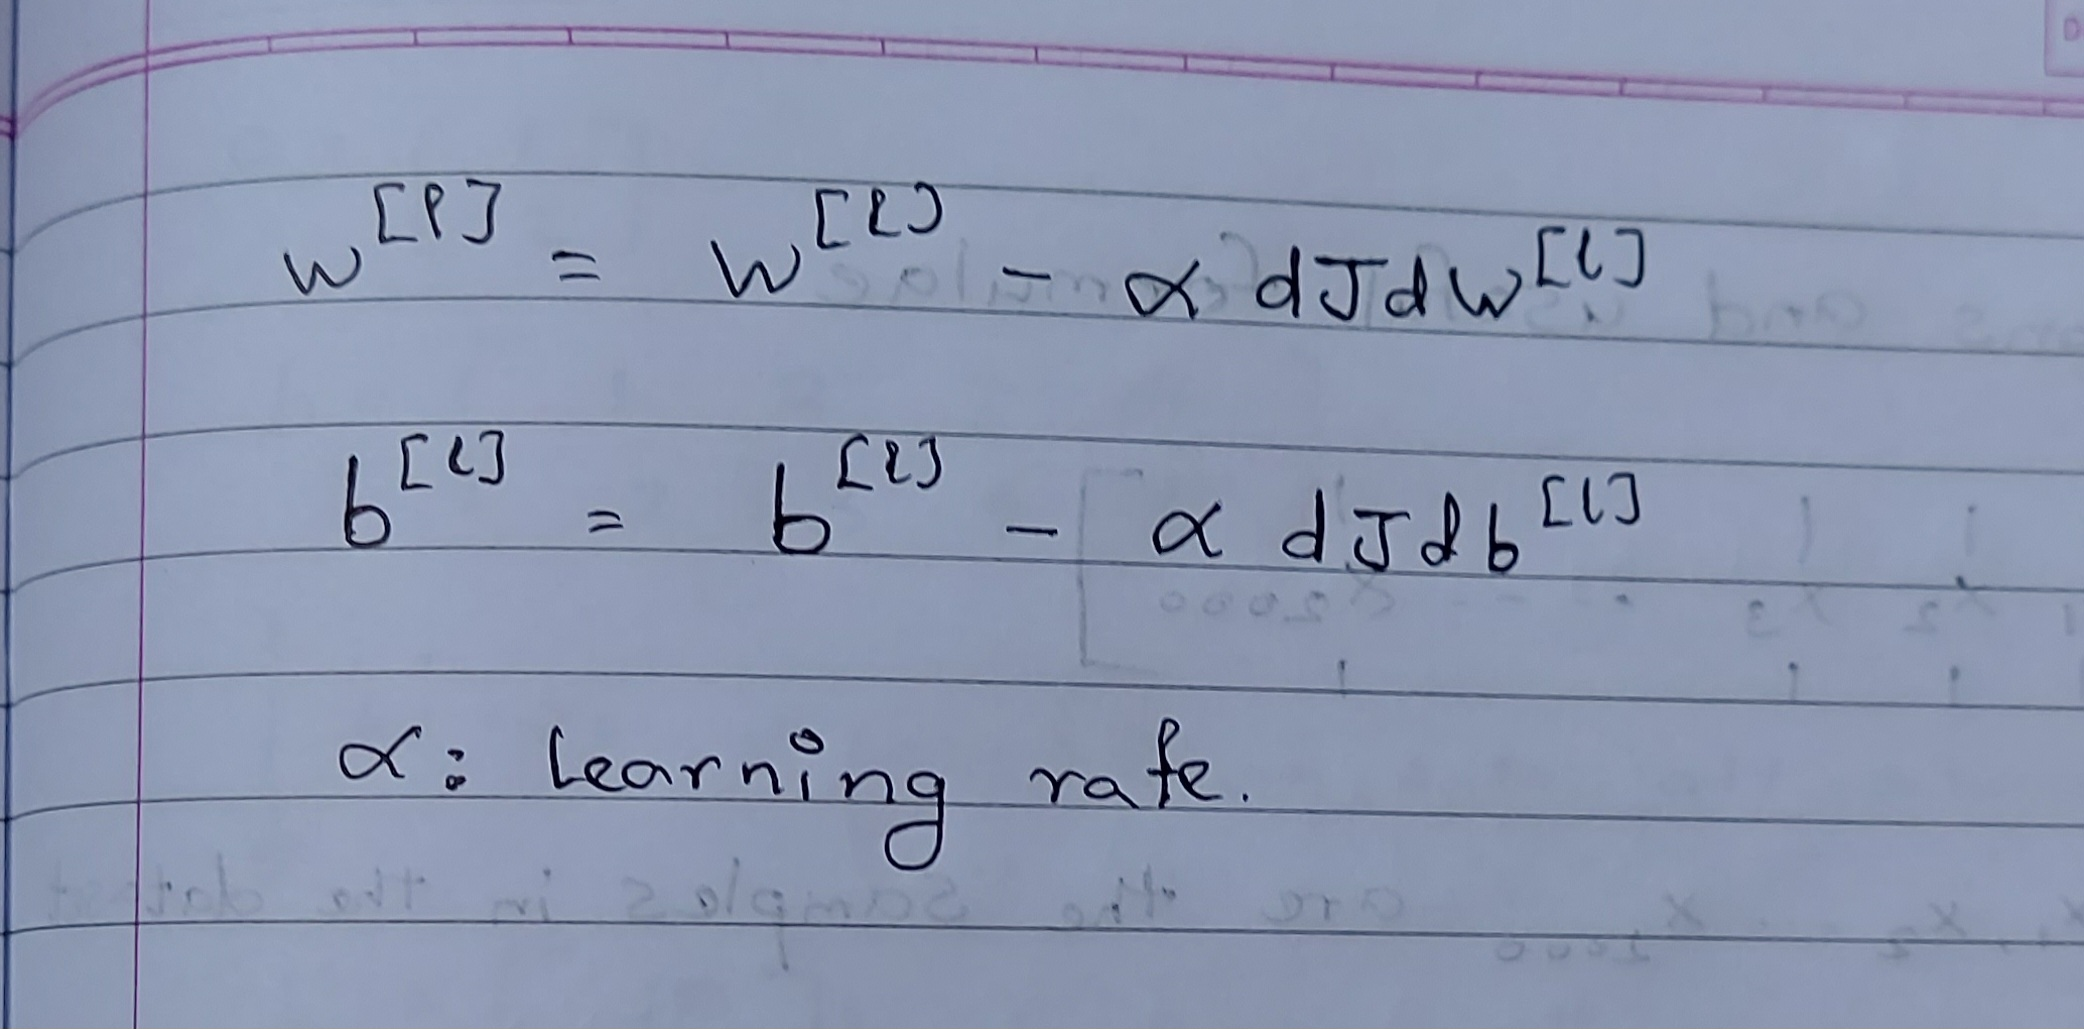

In [5]:
def sigmoid(Z):
  # compute A = sigmoid(Z), using np.exp()
  A = 1/(1+np.exp(-Z))

  # return A and Z both
  return A, Z


In [6]:
def relu(Z):
  # remember Z can be a matrix
  A = np.maximum(0, Z)

  # return A and Z both
  return A, Z


In [7]:
def sigmoid_backward(dJdA, activation_cache):
  # activation cache is nothing but Z
  Z = activation_cache
  sigmoid_dZ= np.exp(-Z)/((1+np.exp(-Z))**2)

  # use both dJdA and Z to compute backprop for sigmoid(dZ)
  dZ = dJDa*sigmoid_dZ

  # return dZ
  return dZ

In [8]:
def relu_backward(dJdA, activation_cache):
  # activation cache is nothing but Z
  Z = activation_cache

  # find backprop for the relu function(dJdZ) using dJdA and Z
  # remember than dJdA and Z can be matrices
  dJdZ = np.multiply(dJdA, np.int64(Z > 0))

  # return dJdZ
  return dJdZ

In [9]:
def initialize_parameters(n_neurons):
  # n_neurons is a list containing the number of neurons in each layer
  # find n_layers using n_neurons list
  n_layers = len(n_neurons)


  # Define two lists namely weights and biases which can hold values of parameters of each layer
  weights = []
  biases = []


  # initialize all W's randomly(using np.random.randn) and put all b's equal to zero(np.zeros)
  # make sure you choose the dimensions of the weights and biases carefully using n_neurons list
  for i in range(1, n_layers):
    W = np.random.randn(n_neurons[i], n_neurons[i-1])
    weights.append(W)

    b = np.zeros((n_neurons[i], 1))
    biases.append(b)



  # return weights and biases
  return weights, biases

In [10]:
def linear_forward(A, W, b):
  # A is the output of the previous layer
  # W and b are the weight and bias values for current layer
  Z = np.dot(W, A) + b
  # compute Z where Z = W*A + b
  # Don't forget to implement using vectorization

  # temporarily store the values of A, W and b in a tuple for backpropagation step.
  # This temporary storage is often called cache
  cache = (A, W, b)

  #return both Z and cache from the function
  return Z, cache

In [11]:
def activation_forward(A, W, b, activation):
  # A is the output of the previous layer
  # W and b are the weight and bias values for current layer
  # activation is the activation function you are using for the current layer

  # now we need to apply non-linearity to the previously computed Z or else
  # the entire nework will become linear regression

  # first get the value of Z and cache using the linear_forward function
  Z, linear_cache = linear_forward(A, W, b)

  # Now apply appropriate activation using if-else statement
  # use sigmoid() and relu() functions defined earlier
  if activation == 'sigmoid':
    A = sigmoid(Z)
  elif activation == 'relu':
    A = relu(Z)



  # store the cache generated by both linear and activation part as the total cache in a tuple
  total_cache = (linear_cache, Z)

  # return A and total_cache
  return A, total_cache

In [12]:
def forward_model(X, weights, biases):
  # X is the input matrix
  # weights is the list containing weights of all layers
  # biases is the list containing biases of all layers

  # define a list to hold cache
  cache_backprop = []

  # initialize the output of the input layer as X
  A = X

  # compute number of layers using either of weights or biases lists
  n_layers = len(weights)

  # compute outputs(A) and total_cache for backpropagation for the initial n_layers - 1 layers
  # with relu activation using a for-loop
  # use activation_forward function defined earlier
  # store the total_cache at each layer in the cache_backprop list
  for i in range(n_layers-1):
    A, total_cache = activation_forward(A, weights[i], biases[i], activation='relu')
    cache_backprop.append(total_cache)






  # compute output(A) and total_cache for backpropagation for the last layer
  # with sigmoid activation
  # use activation_forward function defined earlier
  # store the total_cache in the cache_backprop list
  A_final, total_cache = activation_forward(A, weights[-1], biases[-1], activation='sigmoid')
  cache_backprop.append(total_cache)



  # return A_final and cache_backprop
  return A_final, cache_backprop

In [13]:
def cross_entropy_cost(A_final, Y):
  # A_final is the output of the final layer
  # Y is the true outputs of the dataset
  m = Y.shape[1]
  # find the number of samples in the training data using Y


  # compute the cross entropy loss using np.sum() and np.log() functions
  cost = -np.sum(np.multiply(Y, np.log(A_final)+np.multiply(1 - Y, np.log(1 - A_final))))/m

  # return cost by rounding to 2 places of decimal
  return np.round(cost, 2)

In [14]:
def linear_backward(dJdZ, linear_cache):
  # linear cache has output of previous layer A_prev, W and b of the current layer
  A_prev, W, b = linear_cache
  # retrieve A_prev, W and b from linear_cache

  # find the number of samples in the training data using A_prev
  m = A_prev.shape[1]

  # compute dJdA_prev, dJdW and dJdb
  # make sure you use np.sum with axis=1 and keepdims=True to compute db
  dJdA_prev = np.dot(W.T, dJdZ)
  dJdW = np.dot(dJdZ, A_prev.T)/m
  dJdb = np.sum(dJdZ, axis=1, keepdims=True)/m


  # return dA_prev, dW and db
  return dJdA_prev, dJdW, dJdb

In [15]:
def activation_backward(dJdA, total_cache, activation):
  # total cache has two parts-linear and activation cache
  # activation is the activation function to be applied to the current layer
  linear_cache, activation_cache = total_cache

  # retrieve linear and activation cache from total_cache

  # compute dZ and use it to further compute dA_prev, dW and db
  # use sigmoid_backward() or relu_backward() function according to the activation
  # then use linear_backward() function defined earlier
  # use if-else statement
  if activation == 'sigmoid':
    dJdZ = sigmoid_backward(dJdA, activation_cache)
  elif activation == 'relu':
    dJdZ = relu_backward(dJdA, activation_cache)

    # Compute dA_prev, dW, and db using the appropriate backward functions
  dJdA_prev, dJdW, dJdb = linear_backward(dJdZ, linear_cache)


  # return dA_prev, dW and db
  return dJdA_prev, dJdW, dJdb

In [16]:
def backward_model(A_final, Y, cache_backprop):
  # A_final is the output of the final layer
  # Y is the true output matrix of the dataset
  # cache-backprop is the list which has total_cache computed for each layer
  # during forward pass

  # find no of layers using cache_backprop
  n_layers = len(cache_backprop)
  # find no of samples in the training data using A_final
  m = A_final.shape[1]

  # reshape Y to be the shape of A_final
  Y = Y.reshape(A_final.shape)

  # define 3 lists dJdA, dJdW, dJdb to store the derivatives
  dJdA, dJdW, dJdb = [], [], []




  # initialize backprop by computing dJdA_final, i.e derivative of loss
  # with respect to the output of the final layer
  # use np.divide function
  dJdA_final = -np.divide(Y, A_final) + np.divide(1 - Y, 1 - A_final)

  # initialize current_cache as the last element of array cache_backprop
  # also compute the gradients(dJdA, dJdW, dJdb) at the last output layer with sigmoid activation
  # don't forget to store the gradients in appropriate lists
  # use activation_backward function defined earlier
  current_cache = cache_backprop[-1]
  dJdA_prev, dJdW_prev, dJdb_prev = activation_backward(dJdA_final, current_cache, activation='sigmoid')
  dJdA.append(dJdA_prev)
  dJdW.append(dJdW_prev)
  dJdb.append(dJdb_prev)

  # perform backpropagation for all the n_layers - 1 with relu activation using a for-loop
  # assign cache properly from cache_backprop to current_cache
  # compute dJdA, dJdW, dJdb for each of the layers
  # store these gradients
  # use activation_backward function defined earlier
  for i in reversed(range(n_layers - 1)):
    current_cache = cache_backprop[i]
    dJdA_prev, dJdW_prev, dJdb_prev = activation_backward(dJdA[-1], current_cache, activation='relu')
    dJdA.append(dJdA_prev)
    dJdW.append(dJdW_prev)
    dJdb.append(dJdb_prev)






  # return dJdA, dJdW and dJdb
  return dJdA, dJdW, dJdb

In [17]:
def update_parameters(weights, biases, dJdW, dJdb, learning_rate):
  # weights and biases of each layer in the network
  # dJdW and dJdb to be used to update parameters

  # find the number of layers, n_layers using either of weights or biases
  n_layers = len(weights)

  # update the parameters using learning rate and derivatives(dJdW and dJdb)
  for i in range(n_layers):
    weights[i] -= learning_rate*dJdW[i]
    biases[i] -= learning_rate*dJdb[i]



  # return weights and biases
  return weights, biases

In [18]:
# define the structure of your neural network
# 1st element in the list should be equal to the input vector dimension
# last element in the list should be equal to the output vector dimension
n_neurons = [10, 32, 16, 3]

In [19]:
def model(X, Y, n_neurons, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
  # X is x_train, Y is y_train
  # print_cost is a boolean which allows you to choose whether you want to print
  # cost or not

  #initialize parameters using the initialize_parameters function
  weights, biases = initialize_parameters(n_neurons)

  # loop for gradient descent
  for i in range(0, num_iterations):
    # compute A_final and cache_backprop using forward_model function
    A_final, cache_backprop = forward_model(X, weights, biases)


    # compute cost
  cost = cross_entropy_cost(A_final, Y)


    # find the gradients dJdA, dJdW, dJdb using backward_model function
  dJdA, dJdW, dJdb = backward_model(A_final, Y, cache_backprop)

    # update the weights and biases using update_parameters
  weights, biases = update_parameters(weights, biases, dJdW, dJdb, learning_rate)

    # print cost after every 100 iterations
  if print_cost and i % 100 == 0:
    print("Cost after iteration {}: {}".format(i, cost))



  # return weights and biases
  return weights, biases

In [20]:
# finally training our model on the dataset using model function
# try different values for num_iterations and avoid overfitting
weights, biases = model(x_train, y_train, n_neurons, num_iterations = 100, print_cost = True)

ValueError: ignored

In [ ]:
# use x_test and y_test and write a function which gives the success rate of our
# model on the test set
# print and see if you have improved over Logistic regression or not










In [ ]:
# print the success rate using the above written function




## Try out different values for number of layers and the number of neurons for each layer and see what performance you get